### Exploratory Data Analysis

#### Practical task

Bronwyn Bowles-King

Create an in-depth EDA on the Titanic dataset provided. Your EDA should contain descriptions of each step and appropriate visualisations. Use the metadata for the Titanic dataset to familiarise yourself with the data.

*Import libraries*

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

*Load dataset and preview*

In [106]:
df = pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [107]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


*View all column names*

In [108]:
print("Column names:", df.columns.tolist())

Column names: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


*Note:*

* SibSp is Siblings/Spouse Aboard and Parch is Parents/Children Aboard to show family relationships.
  
* Pclass is Passenger Class. 1 is upper, 2 is middle, and 3 is lower class.
  
* Embarked refers to port where passenger joined the ship. S is Southampton, England; C is Cherbourg, France; and Q is Queenstown, Ireland (Cukierski, 2012).

*Show dataframe dimensions*

In [109]:
print("Dataframe dimensions:", df.shape)

Dataframe dimensions: (891, 12)


*Show missing values percentage for each column*

In [110]:
missing_percent = df.isnull().mean() * 100
missing_table = pd.DataFrame({
    "Column": missing_percent.index,
    "Number of missing values": df.isnull().sum().values,
    "Percentage": missing_percent.round(2).values
})

print('Table 1: Missing data')
display(missing_table)

Table 1: Missing data


,Column,Number of missing values,Percentage
0,PassengerId,0,0.00
1,Survived,0,0.00
2,Pclass,0,0.00
3,Name,0,0.00
4,Sex,0,0.00
5,Age,177,19.87
6,SibSp,0,0.00
7,Parch,0,0.00
8,Ticket,0,0.00
9,Fare,0,0.00


From Table 1, the only column missing data is Age and almost 20% is missing, which is considerable. This can be because the person died along with their family members and so information about them was lost, or for another reason, their age was simply never recorded or it was lost. There is nothing in the data that can be used to infer the age of the passenger.

To get a sense of the passengers onboard in general, charts for age, gender and fare paid are shown below.

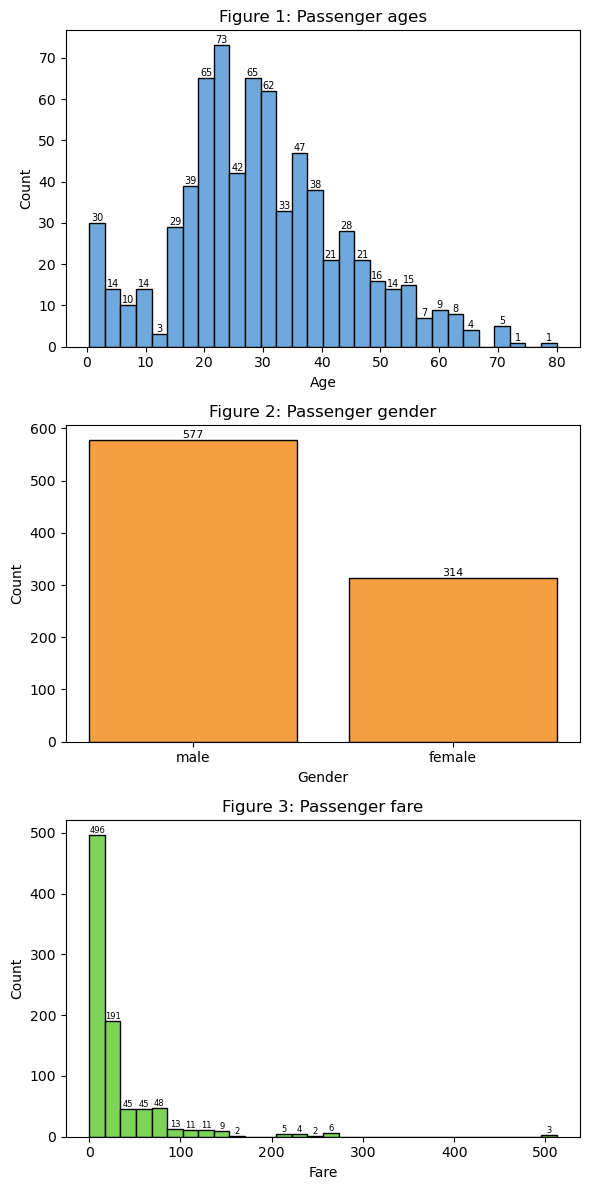

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(6, 12))

# Age (about 20% is missing)
n_age, bins_age, patches_age = axes[0].hist(
    df['Age'].dropna(), bins=30, color='#6fa8dc', edgecolor='black'
)
axes[0].set_title('Figure 1: Passenger ages')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
# Add data labels for age histogram
for count, x in zip(n_age, bins_age[:-1]):
    if count > 0:
        axes[0].text(
            x + (bins_age[1] - bins_age[0])/2, count, str(int(count)), ha='center', va='bottom', fontsize=7
        )

# Gender
sex_counts = df['Sex'].value_counts()
bars = axes[1].bar(sex_counts.index, sex_counts.values, color="#f69f41", edgecolor='black')
axes[1].set_title('Figure 2: Passenger gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')
for bar in bars:
    height = bar.get_height()
    axes[1].text(
        bar.get_x() + bar.get_width()/2, height, str(int(height)), ha='center', va='bottom', fontsize=8
    )

# Fare
n_fare, bins_fare, patches_fare = axes[2].hist(df['Fare'], bins=30, color="#7ed456", edgecolor='black')
axes[2].set_title('Figure 3: Passenger fare')
axes[2].set_xlabel('Fare')
axes[2].set_ylabel('Count')
for count, x in zip(n_fare, bins_fare[:-1]):
    if count > 0:
        axes[2].text(
            x + (bins_fare[1] - bins_fare[0])/2, count, str(int(count)), ha='center', va='bottom', fontsize=6
        )

plt.tight_layout()
plt.show()

● What is the most important factor in determining whether a person was likely to survive the sinking of the Titanic?

For **categorical variables** (Pclass and Sex/Gender), the code below calculates **mean survival rate** for the three passenger classes and for males and females (Brownlee, 2023; Hunt, 2016; Steiger, 2017). We will look for the highest values among these, which are female (0.74) and first-class passenger (0.63). 

In [112]:
# Compare survival by gender 
gender_survival = df.groupby('Sex')['Survived'].mean().round(2)
display(gender_survival)

# Compare survival by passenger class
class_survival = df.groupby('Pclass')['Survived'].mean().round(2)
display(class_survival)

Sex
female    0.74
male      0.19
Name: Survived, dtype: float64

Pclass
1    0.63
2    0.47
3    0.24
Name: Survived, dtype: float64

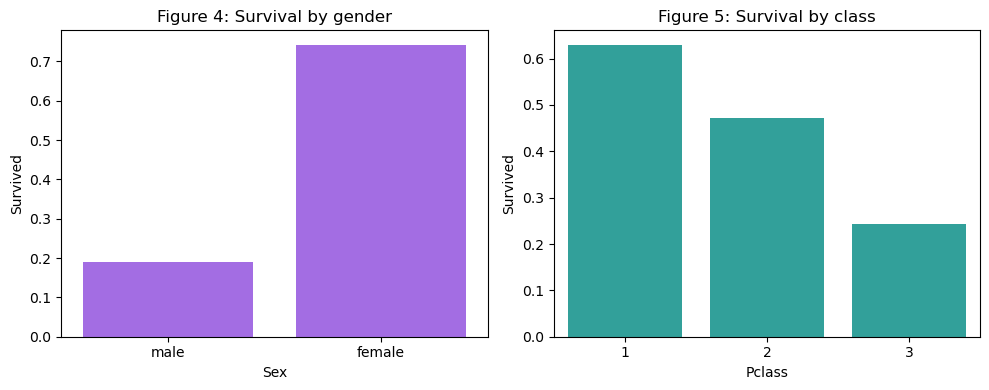

In [121]:
# Visualise survival rate by gender and passenger class
plt.figure(figsize=(10, 4))
plt.subplot(121)
sns.barplot(x='Sex', y='Survived', data=df, color='#a259f7', errorbar=None)
plt.title('Figure 4: Survival by gender')

plt.subplot(122)
sns.barplot(x='Pclass', y='Survived', data=df, color='#20B2AA', errorbar=None)
plt.title('Figure 5: Survival by class')
plt.tight_layout()
plt.show()

Thus far, we can see that being female increased the chance of survival the most, followed by being from the upper class. That many more females survived compared to males is noteworthy considering there are 577 males in the dataset but 314 females (see Figure 2 and 4 below). The high number of males can be because this number includes crew members, who were likely men in most cases.

For the **numerical variables** age, number of family relationships (SibSp and Parch), and fare, I placed them in groups and calculated the survival rate per group (Hunt, 2016; Steiger, 2017).

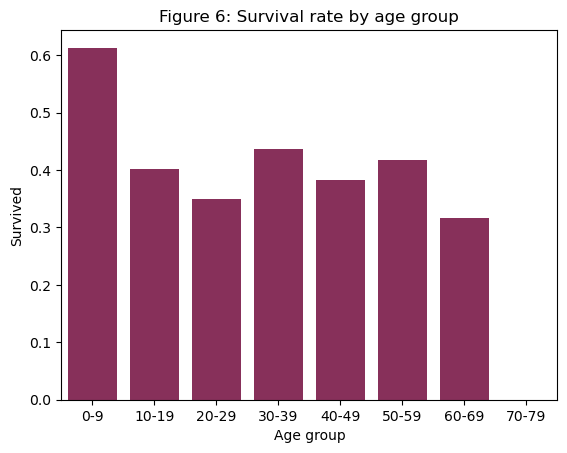

Table 2: Survival rate by age group - Sorted


C:\Users\36050\AppData\Local\Temp\ipykernel_14756\4027252948.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_group = df.groupby(


,Age group,Survived
0,0-9,0.61
3,30-39,0.44
5,50-59,0.42
1,10-19,0.40
4,40-49,0.38
2,20-29,0.35
6,60-69,0.32
7,70-79,0.00


In [119]:
# Create age groups. Rows with missing age values will be excluded by pandas
age_groups = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labs = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['Age group'] = pd.cut(df['Age'], bins=age_groups, labels=age_labs, right=False)

# Plot survival rate by age group
sns.barplot(x='Age group', y='Survived', data=df, color='#96215a', errorbar=None)
plt.title('Figure 6: Survival rate by age group')
plt.show()

# Sort the results and display
survival_by_age_group = df.groupby(
    'Age group')['Survived'].mean().reset_index().sort_values('Survived', ascending=False
).round(2)
print("Table 2: Survival rate by age group - Sorted")
display(survival_by_age_group)

From Figure 6: Survival rate by age group, those under 10 years were most likely to survive (61%), probably being protected by older people. However, older children and teenagers between 10 and 19 have a similar survival rate to those from 30 and up to 59 years (between 38% and 44% for these age groups) (see Table 2: Survival rate by age group - Sorted above). On the other hand, young passengers between 20 and 29 (35%) also have a similar survival rate to those between 60 and 69 years (32%). Those over 70 years did not survive. 

The data for those between 10 and 69 is thus somewhat random and difficult to draw a firm conclusion about. Another confounding factor is that almost 20% of the age data is missing. This also casts doubt on the conclusions that can be made about age.

Nevertheless, that 61% of children under 10 years survived and that the data is most concentrated around the youngest age groups overall shows that a younger age generally increased the chances of surviving.

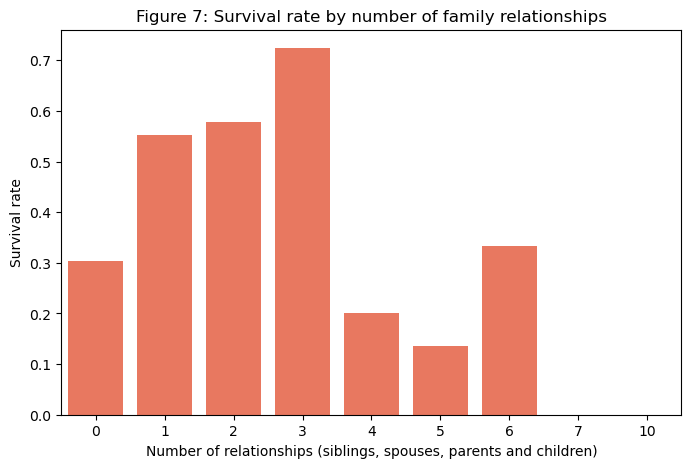

In [115]:
# Create a new column 'Family' for sum of SibSp and Parch
df['Family'] = df['SibSp'] + df['Parch']

plt.figure(figsize=(8, 5))
sns.barplot(x='Family', y='Survived', data=df, color="#ff6a49", errorbar=None)
plt.title('Figure 7: Survival rate by number of family relationships')
plt.xlabel('Number of relationships (siblings, spouses, parents and children)')
plt.ylabel('Survival rate')
plt.show()

Figure 7 above shows the survival rate based on a passenger having siblings, spouses, parents and/or children. This data is also too random, and does not show any strong trend towards having more or fewer family members as affecting survival. 

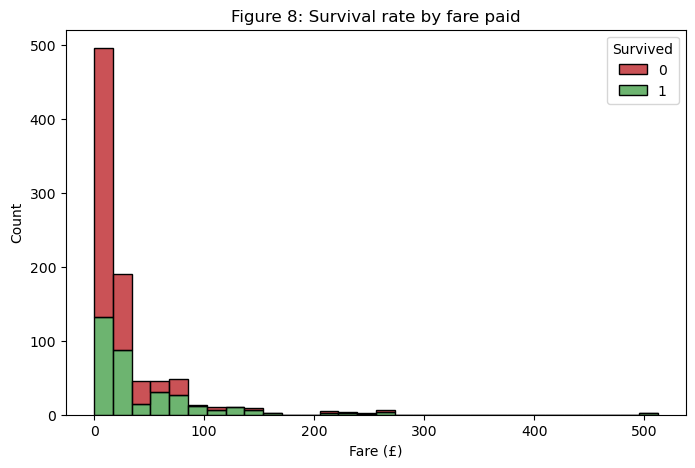

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(
    data=df, x='Fare', bins=30, hue='Survived', multiple='stack', palette={0: "#b9181e", 1: "#3c9b40"}
)
plt.title('Figure 8: Survival rate by fare paid')
plt.xlabel('Fare (£)')
plt.ylabel('Count')
plt.show()

Figure 8: Survival rate by fare paid shows that the less one paid, the less likely one was to survive. This is related to the passenger class. However, many people who paid a lower fare still survived compared to those who paid more, as the number of upper-class passengers was apparently very small (see also Figure 3 above). Figure 6 to 8 above do not show as strong correlations between the factors considered and survival as we find with gender. 

*Conclusion: Overall, based on the data we have, a passenger who was female was most likely to survive the Titanic.*

● In the movie, the upper-class passengers were given preference on lifeboats. Does this show in the data?

*Yes, from Figure 5: Survival by class above, we can see that a greater proportion of passengers in first class survived, followed by middle- and then lower-class passengers.*

● “Women and children first”. Was this the case?

*Yes, this certainly is backed up by the data. Figure 4 and Figure 6 show that more women, girls and boys survived overall than adult men, despite men being the majority on board.*

● Add one other observation that you have noted in the dataset.

*64 men named William boarded the Titanic and only 23 survived. The 41 who died were likely mostly younger and middle-aged men from low-income groups and crew members.*

In [117]:
# Exclude titles from passenger names
xtitles = ['Mr', 'Mrs', 'Miss', 'Master']

# Combine titles with regex pattern for removal
pattern = r'\b(?:' + '|'.join(re.escape(title) for title in xtitles) + r')\b'

# Extract column, remove titles, and create new list
words = df['Name'].str.replace(pattern, '', regex=True) \
                  .str.replace('[^a-zA-Z ]', '', regex=True) \
                  .str.split().explode().str.lower()

# Remove empty strings
words = words[words != '']

# Count most common names
common_words = Counter(words).most_common(10)
print("Most common passenger names:")
for word, count in common_words:
    print(f"{word}: {count}")

Most common passenger names:
william: 64
john: 44
henry: 35
james: 24
george: 24
charles: 23
thomas: 22
mary: 20
edward: 18
anna: 17


In [ ]:
# Get names for passengers who died
deceased = df[df['Survived'] == 0]['Name'] \
    .str.replace(pattern, '', regex=True) \
    .str.replace('[^a-zA-Z ]', '', regex=True) \
    .str.split().explode().str.lower()

# Remove empty strings
deceased = deceased[deceased != '']

# Count most common names among those who died
common_deceased = Counter(deceased).most_common(10)
print("Most common names among passengers who died:")
for name, count in common_deceased:
    print(f"{name}: {count}")

Most common names among passengers who died:
william: 41
john: 33
henry: 25
james: 18
charles: 16
george: 16
thomas: 14
johan: 13
edward: 12
joseph: 11


**References**

Brownlee, J. (2023). How to Calculate Correlation Between Variables in Python. https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables

Cukierski, W. (2012). Titanic - Machine Learning from Disaster. Kaggle. https://kaggle.com/c/titanic/data 

EPA. (2025). Exploratory Data Analysis. https://www.epa.gov/caddis/exploratory-data-analysis

Hunt, G. (2016). Titanic Dataset Investigation. https://ghunt03.github.io/DAProjects/DAP02/TitanicDatasetInvestigation.html

HyperionDev. (2025). Data Cleaning and Preprocessing. Course materials. Private repository, GitHub.

HyperionDev. (2025). Exploratory Data Analysis. Course materials. Private repository, GitHub.

Nehme, A. (2024). Mastering the Pandas .explode() Method: A Comprehensive Guide. https://www.datacamp.com/tutorial/pandas-explode

pandas. (2024). pandas.isnull. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html

Python Software Foundation. (2024). collections.Counter. https://docs.python.org/3/library/collections.html#collections.Counter

Python Software Foundation. (2024). re — Regular expression operations. https://docs.python.org/3/library/re.html

Steiger, T. (2017). Analysis of Titanic Survival Data. https://ttsteiger.github.io/projects/titanic_report.html